# 서울시 범죄현황 통계자료 분석 및 시각화
<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

<br>

#### 1. 데이터 입력 및 데이터 전처리

In [20]:
# 서울시 관서별 5대 범죄 발생 & 검거 현황 @ data.go.kr

df = pd.read_excel('관서별 5대범죄 발생 및 검거.xlsx') # 엑셀 파일 읽기?
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,계,92679,65378,141,125,138,130,5763,4749,38293,19355,48344,41019
1,중부서,2057,1406,1,1,3,4,113,76,943,495,997,830
2,종로서,1694,1179,9,6,4,4,115,93,602,284,964,792
3,남대문서,1354,917,1,1,2,2,73,52,699,368,579,494
4,서대문서,2533,1706,3,3,2,1,159,149,1077,524,1292,1029


#### 경찰서를 구별로 정리하기

In [21]:
# 서울시 경찰청의 소속 구 @ https://goo.gl/MQSqXX
police_to_gu = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

# dict[칼럼명].apply(칼럼 내 데이터마다 적용할 함수)
# dict.get(key)는 value 를 return
df['구별'] = df['관서명'].apply(lambda x: police_to_gu.get(x, '구 없음')) 
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,92679,65378,141,125,138,130,5763,4749,38293,19355,48344,41019,구 없음
1,중부서,2057,1406,1,1,3,4,113,76,943,495,997,830,중구
2,종로서,1694,1179,9,6,4,4,115,93,602,284,964,792,종로구
3,남대문서,1354,917,1,1,2,2,73,52,699,368,579,494,중구
4,서대문서,2533,1706,3,3,2,1,159,149,1077,524,1292,1029,서대문구


In [22]:
# 관서별 데이터를 구별 데이터로 변경 (index : 관서 이름 -> 구 이름, column은 자동으로 오름차순 정렬됨)
# 같은 구의 경우에는 sum 을 적용 

gu_df = pd.pivot_table(df, index='구별', aggfunc=np.sum)
gu_df

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,627,708,11,14,5,6,5245,7356,1491,2951,3111,3677
강동구,167,188,14,15,3,3,2662,3788,781,1640,1697,1942
강북구,132,159,4,5,8,9,2259,2770,490,780,1625,1817
강서구,222,265,5,6,9,10,3393,4415,1070,1689,2087,2445
관악구,351,403,3,3,12,12,3858,5261,1137,2229,2355,2614
광진구,224,255,4,4,2,2,2511,3601,874,1664,1407,1676
구 없음,4749,5763,130,138,125,141,65378,92679,19355,38293,41019,48344
구로구,142,197,5,5,6,6,2984,4175,1008,1763,1823,2204
금천구,93,117,6,7,4,4,1966,2598,553,999,1310,1471


In [23]:
gu_df = gu_df.drop(['구 없음']) # df.drop([row]) : 해당 행 데이터를 drop == DB 에서 특정 데이터를 drop 하는 것과 동일
gu_df

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,627,708,11,14,5,6,5245,7356,1491,2951,3111,3677
강동구,167,188,14,15,3,3,2662,3788,781,1640,1697,1942
강북구,132,159,4,5,8,9,2259,2770,490,780,1625,1817
강서구,222,265,5,6,9,10,3393,4415,1070,1689,2087,2445
관악구,351,403,3,3,12,12,3858,5261,1137,2229,2355,2614
광진구,224,255,4,4,2,2,2511,3601,874,1664,1407,1676
구로구,142,197,5,5,6,6,2984,4175,1008,1763,1823,2204
금천구,93,117,6,7,4,4,1966,2598,553,999,1310,1471
노원구,148,169,3,3,3,4,2581,3743,646,1404,1781,2163


#### 범죄별로 검거율 계산하기

In [24]:
# 발생건수 대비 검거건수 -> 검거율 데이터 column을 범죄별로 생성

gu_df['강간검거율'] = gu_df['강간(검거)']/gu_df['강간(발생)']*100
gu_df['강도검거율'] = gu_df['강도(검거)']/gu_df['강도(발생)']*100
gu_df['살인검거율'] = gu_df['살인(검거)']/gu_df['살인(발생)']*100
gu_df['절도검거율'] = gu_df['절도(검거)']/gu_df['절도(발생)']*100
gu_df['폭력검거율'] = gu_df['폭력(검거)']/gu_df['폭력(발생)']*100
gu_df['검거율'] = gu_df['소계(검거)']/gu_df['소계(발생)']*100
gu_df.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,,
강남구,627,708,11,14,5,6,5245,7356,1491,2951,3111,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338
강동구,167,188,14,15,3,3,2662,3788,781,1640,1697,1942,88.829787,93.333333,100.000000,47.621951,87.384140,70.274551
강북구,132,159,4,5,8,9,2259,2770,490,780,1625,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,222,265,5,6,9,10,3393,4415,1070,1689,2087,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,351,403,3,3,12,12,3858,5261,1137,2229,2355,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066


In [28]:
# 필요없는 column 지우기 (범죄별 발생 건수와 검거율만 남긴다)

# df.drop(['row']) : 해당 행 데이터를 drop 
# del df['column'] : 해당 열 데이터를 drop

del gu_df['강간(검거)']
del gu_df['강도(검거)']
del gu_df['살인(검거)']
del gu_df['절도(검거)']
del gu_df['폭력(검거)']
del gu_df['소계(발생)']
del gu_df['소계(검거)']

gu_df.head()

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140,70.274551
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066


In [29]:
# 발생건수는 2016이고, 그 전에 발생한 범죄에 대한 검거가 2016에 이뤄지면 검거수에 반영된 것
# if 문을 쓸 필요 없이 바로 boolean 체크 후 값 대입 적용이 가능 

gu_df[gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
gu_df.head(10)

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140,70.274551
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881,69.730630
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249,71.473054
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065,75.673595
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344,68.955383


In [9]:
# 위 방법과 유사한 방식으로 Filtering 적용이 가능함

# 살인사건 발생 건수가 7건이 넘는 지역구를 추려내려면?
gu_df[ gu_df['살인(발생)'] > 7 ]

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066
동대문구,161,6,10,1440,1784,88.198758,83.333333,80.000000,49.513889,89.517937,72.478683
마포구,348,4,9,1483,1844,82.471264,75.000000,88.888889,45.785570,84.436009,68.709328
종로구,192,7,9,1183,1711,76.041667,100.000000,66.666667,50.211327,82.992402,70.051580
중랑구,183,5,10,1506,2022,83.606557,100.000000,90.000000,59.030544,85.262117,74.637681


In [10]:
# 살인사건 발생 건수가 7건이 넘고(and) 폭력사건 발생 건수가 2000건을 넘는 지역구를 추려내려면?
gu_df[ (gu_df['살인(발생)'] > 7) & (gu_df['폭력(발생)'] > 2000) ] 

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강서구,265,6,10,1689,2445,83.773585,83.333333,90.0,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.0,51.009421,90.091813,73.332066
중랑구,183,5,10,1506,2022,83.606557,100.000000,90.0,59.030544,85.262117,74.637681


In [13]:
# 살인사건 발생 건수가 7건이 넘거나(or) 폭력사건 발생 건수가 2000건이 넘는 지역구를 추려내려면?
gu_df[ (gu_df['살인(발생)'] > 7) | (gu_df['폭력(발생)'] > 2000) ] # Shift + 키보드 ₩

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249,71.473054
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344,68.955383
동대문구,161,6,10,1440,1784,88.198758,83.333333,80.000000,49.513889,89.517937,72.478683
마포구,348,4,9,1483,1844,82.471264,75.000000,88.888889,45.785570,84.436009,68.709328
서초구,396,6,5,2021,2173,76.515152,66.666667,100.000000,47.501237,81.914404,66.333406


In [16]:
# 살인사건 발생 건수가 5건을 넘지 않는(not) 지역구를 추려내려면?
gu_df[ ~(gu_df['살인(발생)'] > 5) ] # not의 비트 논리 연산자는 "~"입니다.

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강동구,188,15,3,1640,1942,88.829787,93.333333,100.0,47.621951,87.384140,70.274551
광진구,255,4,2,1664,1676,87.843137,100.000000,100.0,52.524038,83.949881,69.730630
금천구,117,7,4,999,1471,79.487179,85.714286,100.0,55.355355,89.055065,75.673595
노원구,169,3,4,1404,2163,87.573964,100.000000,75.0,46.011396,82.339344,68.955383
도봉구,82,2,0,861,1234,100.000000,100.000000,NaN,44.018583,82.820097,68.379991
동작구,226,1,1,1341,1631,53.539823,100.000000,100.0,44.146160,83.997548,65.187500
서대문구,159,2,3,1077,1292,93.710692,50.000000,100.0,48.653668,79.643963,67.350967
서초구,396,6,5,2021,2173,76.515152,66.666667,100.0,47.501237,81.914404,66.333406
성동구,115,3,5,1016,1223,85.217391,100.000000,100.0,55.610236,90.188062,75.105843


In [26]:
# 도봉구의 경우 2020년 살인 발생 & 검거 건수가 0이므로 
# 검거율 계산 시 0으로 나누는 계산으로 인해 '살인검거율'의 값이 NaN(Not a Number, 결측치의 일종)이 됨

gu_df[ gu_df['살인(발생)'] == 0 ] # 살인사건 발생 건수가 0건인 지역구를 추려내려면?

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,,
도봉구,87,82,2,2,0,0,1490,2179,379,861,1022,1234,106.097561,100.0,NaN,44.018583,82.820097,68.379991


In [32]:
# '살인검거율' 열의 결측치를 100으로 채워주기 (결측치가 채워진 열을 기존 열에 덮어써줘야 하는 것에 유의)

gu_df['살인검거율'] = gu_df['살인검거율'].fillna(100) # 결측치(N/A)의 값을 채워주다(fill)

In [33]:
gu_df[ gu_df['살인(발생)'] == 0 ] # 살인사건 발생 건수가 0건인 지역구를 추려내려면?

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
도봉구,82,2,0,861,1234,100.0,100.0,100.0,44.018583,82.820097,68.379991


In [34]:
gu_df.rename(columns = {'강간(발생)':'강간',
                        '강도(발생)':'강도',
                        '살인(발생)':'살인',
                        '절도(발생)':'절도',
                        '폭력(발생)':'폭력'}, inplace=True) # inplace 옵션 == 덮어쓰기 여부

gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140,70.274551
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066


#### 인구 데이터 merge 하기 

In [2]:
popul_df = pd.read_csv('pop_kor.csv', encoding='utf-8')
popul_df.head()

,구별,인구수
0,강남구,537800
1,강동구,466472
2,강북구,302563
3,강서구,579768
4,관악구,499449


In [3]:
# 구별 index 를 기준으로 merge를 할 것이므로, index 를 세팅해주기

popul_df = pd.read_csv('pop_kor.csv', encoding='utf-8', index_col='구별')
popul_df.head()

,인구수
구별,
강남구,537800
강동구,466472
강북구,302563
강서구,579768
관악구,499449


In [37]:
gu_df = gu_df.join(popul_df) # df1.join(df2) : df1 의 index를 기준으로 df2 의 index 중 매칭되는 값을 매김
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017,71.302338,537800
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140,70.274551,466472
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347,302563
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642,579768
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813,73.332066,499449


<br>

#### 2. 데이터 살펴보기 (Data exploration)

In [38]:
# 검거율 기준으로 오름차순 정렬하기

gu_df.sort_values(by='검거율', ascending=False, inplace=True) # ascending=False : 내림차순, inplace=True : 덮어쓰기
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347,302563
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642,579768
성북구,142,3,4,988,1430,85.211268,66.666667,100.000000,58.704453,86.713287,75.847293,440142
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065,75.673595,244891
성동구,115,3,5,1016,1223,85.217391,100.000000,100.000000,55.610236,90.188062,75.105843,292672


#### 범죄별 발생 건수 정규화하기 (범죄별로 가장 많이 발생한 구가 1 == 100%)

In [39]:
# 5대 범죄별 수치를 해당 범죄별 최대값으로 나눠줌 

target_col = ['강간', '강도', '살인', '절도', '폭력']
weight_col = gu_df[target_col].max()
weight_col

강간     708
강도      15
살인      12
절도    2951
폭력    3677
dtype: int64

In [40]:
crime_count_norm = gu_df[target_col]/weight_col
crime_count_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강북구,0.224576,0.333333,0.750000,0.264317,0.494153
강서구,0.374294,0.400000,0.833333,0.572348,0.664944
성북구,0.200565,0.200000,0.333333,0.334802,0.388904
금천구,0.165254,0.466667,0.333333,0.338529,0.400054
성동구,0.162429,0.200000,0.416667,0.344290,0.332608
은평구,0.241525,0.266667,0.333333,0.464588,0.500408
중랑구,0.258475,0.333333,0.833333,0.510335,0.549905
관악구,0.569209,0.200000,1.000000,0.755337,0.710906
동대문구,0.227401,0.400000,0.833333,0.487970,0.485178


#### 한글 데이터 시각화를 위한 준비

In [41]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

#### 구별 살인 발생 순위 살펴보기

<AxesSubplot:ylabel='구별'>

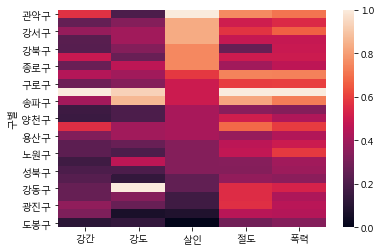

In [42]:
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False)) # ascending=False : 내림차순

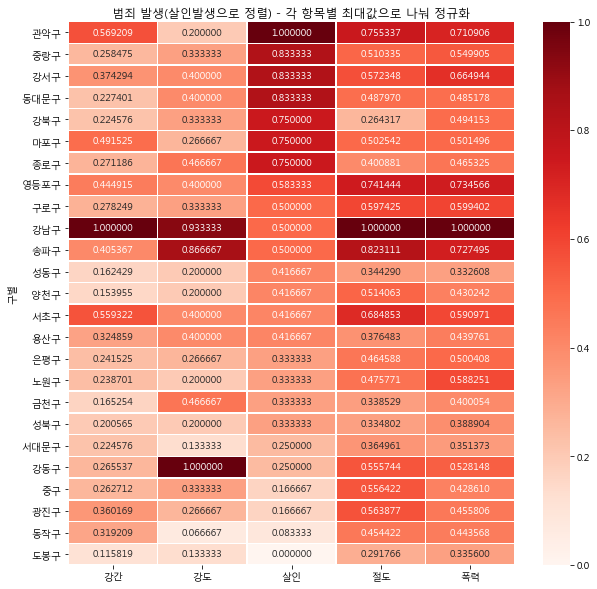

In [44]:
# 몇 가지 옵션으로 더 내용을 확인하기 편하도록 수정하기

# 전체 figure 의 사이즈를 조정
plt.figure(figsize = (10,10))

# annot : 셀 내에 수치 입력 여부
# fmt : 셀 내 입력될 수치의 format (f == float)
# linewidths : 셀 간 이격거리 (하얀 부분, 내부 테두리)
# cmap : matplotlib colormap @ https://goo.gl/YWpBES
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='Reds')

plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

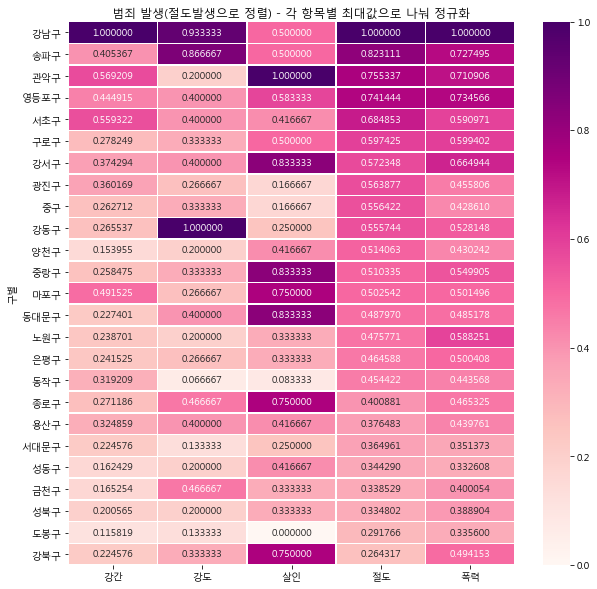

In [45]:
# 살인 대신 절도 기준으로 살펴보기

plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='절도', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('범죄 발생(절도발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

#### (단순히 범죄건수만 보지 말고) 인구수로 나눠서 인구대비 발생비율로 살펴보기

In [46]:
crime_count_norm.head(3)

,강간,강도,살인,절도,폭력
구별,,,,,
강북구,0.224576,0.333333,0.750000,0.264317,0.494153
강서구,0.374294,0.400000,0.833333,0.572348,0.664944
성북구,0.200565,0.200000,0.333333,0.334802,0.388904


In [47]:
gu_df.head(3)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132,81.552347,302563
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873,76.851642,579768
성북구,142,3,4,988,1430,85.211268,66.666667,100.000000,58.704453,86.713287,75.847293,440142


In [48]:
# 행(구)별로 구별 범죄 수 (max 대비 비율값) / 구별 인구 수 * 100000 
# 인구 수 단위인 10만을 곱해준다 (강서구 강간 = 9.795665e-07 -> 0.x 까지 끌어올리기)

crime_ratio = crime_count_norm.div(gu_df['인구수'], axis=0) * 100000 
crime_ratio.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강북구,0.074225,0.110170,0.247882,0.087359,0.163322
강서구,0.064559,0.068993,0.143736,0.098720,0.114691
성북구,0.045568,0.045440,0.075733,0.076067,0.088359
금천구,0.067481,0.190561,0.136115,0.138237,0.163360
성동구,0.055499,0.068336,0.142366,0.117637,0.113645


#### [ 인구수 대비 ]  구별 살인 발생 순위 살펴보기

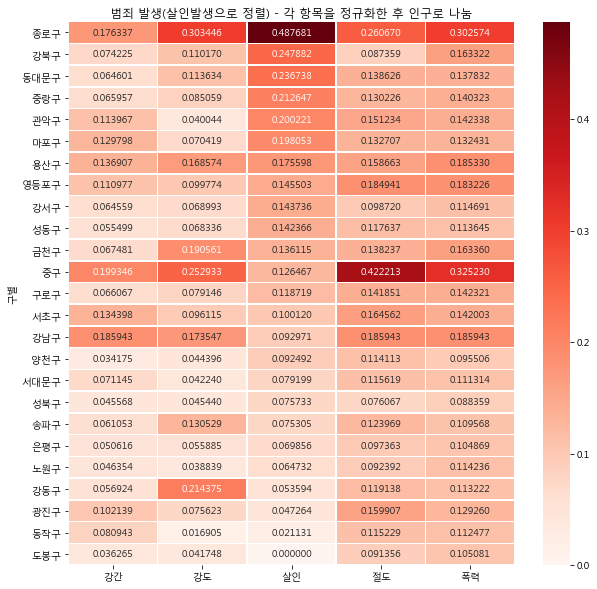

In [49]:
plt.figure(figsize = (10,10))

sns.heatmap(crime_ratio.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='Reds')
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()

#### [ 인구 수 대비 ] 구별 5대범죄 발생 수치 평균

In [50]:
# 구별 인구 대비 
crime_ratio['전체발생비율'] = crime_ratio.mean(axis=1) # axis=1 : columns-oriented
crime_ratio.head()

,강간,강도,살인,절도,폭력,전체발생비율
구별,,,,,,
강북구,0.074225,0.110170,0.247882,0.087359,0.163322,0.136592
강서구,0.064559,0.068993,0.143736,0.098720,0.114691,0.098140
성북구,0.045568,0.045440,0.075733,0.076067,0.088359,0.066233
금천구,0.067481,0.190561,0.136115,0.138237,0.163360,0.139151
성동구,0.055499,0.068336,0.142366,0.117637,0.113645,0.099497


#### [ 인구 수 대비 ] [ 5대범죄 발생 수치 평균 ] 기준 구별 순위 비교

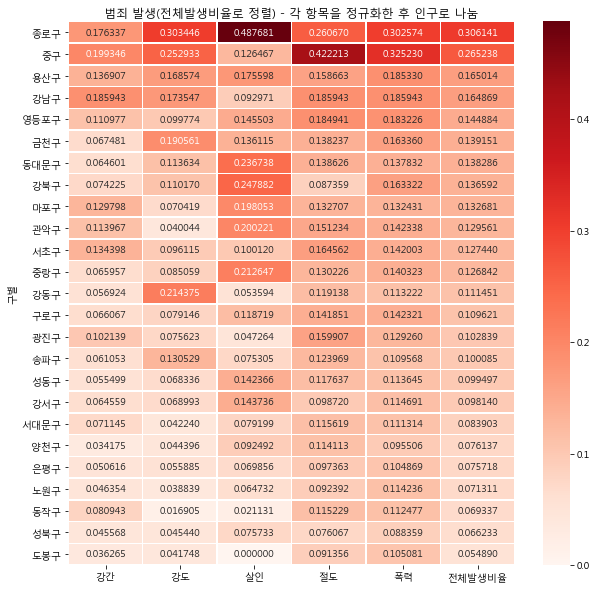

In [51]:
plt.figure(figsize = (10,10))

sns.heatmap(crime_ratio.sort_values(by='전체발생비율', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='Reds')
plt.title('범죄 발생(전체발생비율로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()

<br>

#### 3. 데이터 시각화 (Data visualization, geo-mapping)

- 지도 시각화 : Folium library 을 활용합니다. 
- 지도 데이터 : https://github.com/southkorea/southkorea-maps 에서 서울만 따로 추린 GeoJSON 데이터를 활용합니다
  <br>(southkorea-maps/kostat/2013/json/skorea_municipalities_geo_simple.json)
<br>
<br>
- GeoJSON : JSON 데이터 형식을 활용한 공간 데이터 교환 포맷(Geospatial Data Interchange Format)
- GeoJSON에서 Feature는 Geometry object와 속성정보를 담고 있고, Feature 컬렉션은 Feature의 집합으로 구성됩니다.
- 상세 정보 링크 : https://goo.gl/GL2F2w & https://goo.gl/E4NCLC
<br>
<br>
- **Folium library 설치 :**
- pip install folium==0.5.0
- pip install --index-url=http://pypi.python.org/simple/ --trusted-host pypi.python.org folium==0.5.0
- conda install folium==0.5.0

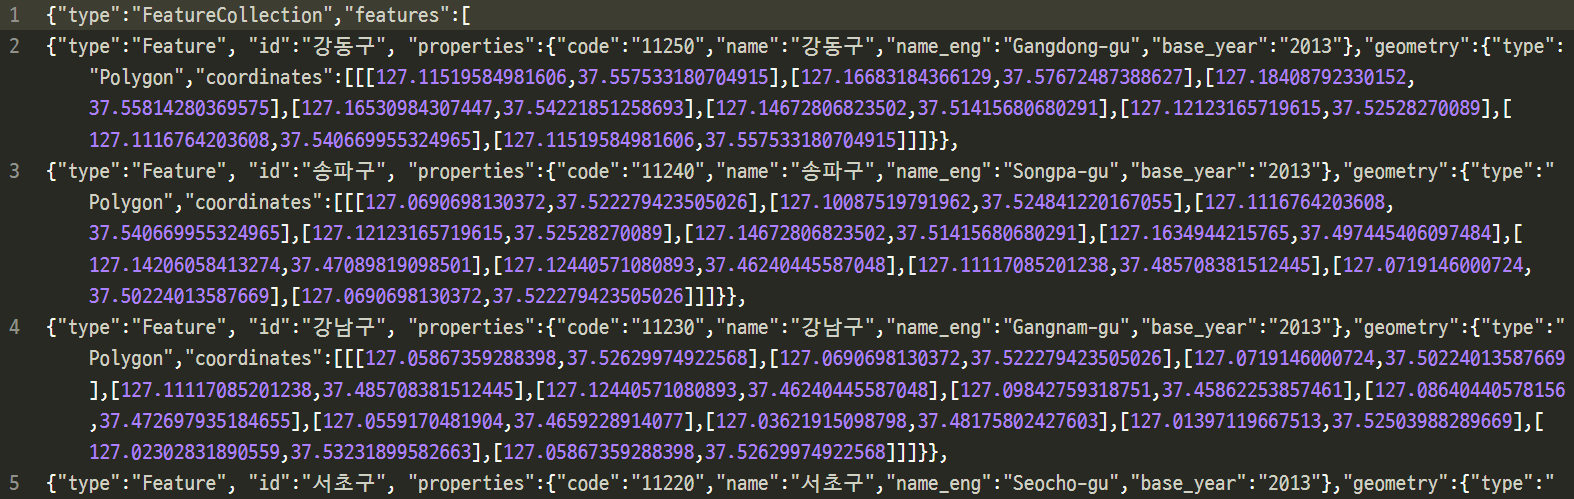

In [ ]:
!pip install folium==0.5.0

In [52]:
# import warnings
# warnings.simplefilter(action = "ignore", category = FutureWarning)

import json

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [53]:
geo_str['features'][0]

{'type': 'Feature',
 'id': '강동구',
 'properties': {'code': '11250',
  'name': '강동구',
  'name_eng': 'Gangdong-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.11519584981606, 37.557533180704915],
    [127.16683184366129, 37.57672487388627],
    [127.18408792330152, 37.55814280369575],
    [127.16530984307447, 37.54221851258693],
    [127.14672806823502, 37.51415680680291],
    [127.12123165719615, 37.52528270089],
    [127.1116764203608, 37.540669955324965],
    [127.11519584981606, 37.557533180704915]]]}}

In [54]:
geo_str['features'][0]['id']

'강동구'

#### 구별 살인사건 발생 건수 시각화

In [1]:
import folium

# tiles = 지도 타입 (Stamen Terrain 도 가능)
# location : 초기 지도 center 위치
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

# 살인사건 발생건수 시각화
# choropleth : Choropleth map @ https://goo.gl/yrTRHU
map.choropleth(geo_data = geo_str, # 서울시 행정구역별 polygon drawing
               data = gu_df['살인'], # 시각화의 대상이 될 데이터
               columns = [gu_df.index, gu_df['살인']], # 1) df의 index 칼럼을 가져와 인식하고
               fill_color = 'PuRd', #PuRd, YlGnBu (maybe Purple & Red)
               key_on = 'feature.id') # GeoJSON 규약을 따름, json 파일(지도 데이터)의 "feature" type의 "id" 에 매칭된다

# key_on: Variable in the GeoJSON file to bind the data to. 
# Must always start with 'feature' and be in JavaScript objection notation. 
# Ex: 'feature.id' or 'feature.properties.statename'.

map

#### [ 인구 수 대비 ] [ 5대범죄 발생 수치 평균 ] 기준 구별 데이터 시각화

In [2]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

# 전체 5대 범죄 인구당 발생비율 시각화
map.choropleth(geo_data = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

#### 구별 검거율 데이터 시각화

In [3]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

# 검거율 시각화
map.choropleth(geo_data= geo_str,
               data = gu_df['검거율'],
               columns = [gu_df.index, gu_df['검거율']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu (Yellow, Green, Blue)
               key_on = 'feature.id')
map

<br>

#### (Extra) 경찰서 위치 및 경찰서별 검거율 시각화

#### 경찰서별 검거율 계산하기

In [58]:
# 경찰서 검거율을 동시 표시

df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,92679,65378,141,125,138,130,5763,4749,38293,19355,48344,41019,구 없음
1,중부서,2057,1406,1,1,3,4,113,76,943,495,997,830,중구
2,종로서,1694,1179,9,6,4,4,115,93,602,284,964,792,종로구
3,남대문서,1354,917,1,1,2,2,73,52,699,368,579,494,중구
4,서대문서,2533,1706,3,3,2,1,159,149,1077,524,1292,1029,서대문구


In [59]:
df = df.drop([0]) # "계" row를 삭제

# 경찰서 full-name column 생성하기 (구글맵스에서 좌표를 얻기 위해 경찰서 full-name으로 검색)
station_name = []
for name in df['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서') # str(name[:-1] == ex. 중부서 -> 중부 

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [60]:
df['경찰서'] = station_name
df['검거율'] = df['소계(검거)']/df['소계(발생)']*100
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율
1,중부서,2057,1406,1,1,3,4,113,76,943,495,997,830,중구,서울중부경찰서,68.351969
2,종로서,1694,1179,9,6,4,4,115,93,602,284,964,792,종로구,서울종로경찰서,69.598583
3,남대문서,1354,917,1,1,2,2,73,52,699,368,579,494,중구,서울남대문경찰서,67.725258
4,서대문서,2533,1706,3,3,2,1,159,149,1077,524,1292,1029,서대문구,서울서대문경찰서,67.350967
5,혜화서,1408,994,0,0,3,3,77,53,581,310,747,628,종로구,서울혜화경찰서,70.596591


#### 경찰서별 검거율 점수 계산하기

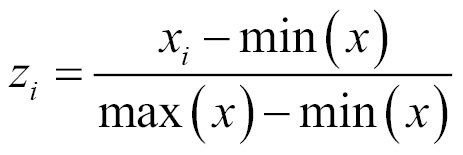
- Min-max algorithm @ https://goo.gl/ozeL52
- Converts data range to 0~1

In [61]:
# ['검거율'] 열을 대상으로, 
# 가장 낮은 검거율과 가장 높은 검거율을 가지는 경찰서를 일종의 점수 개념으로 간격을 벌림 (지도에서 보다 더 잘 비교되도록 하기 위함)

# 1) newMax-newMin 를 곱해주는 이유 : 0~1 대신에 특정한 range 로 변환 (여기서는 1~100)
# 2) newMin 인 1을 더해주는 이유 : 최소값인 0을 갖는 데이터가 시각화 시 아예 데이터가 표현되지 않는 것을 방지
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin 

df['점수'] = reRange(df['검거율'], min(df['검거율']), max(df['검거율']), 1, 100)
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수
1,중부서,2057,1406,1,1,3,4,113,76,943,495,997,830,중구,서울중부경찰서,68.351969,22.839754
2,종로서,1694,1179,9,6,4,4,115,93,602,284,964,792,종로구,서울종로경찰서,69.598583,30.126597
3,남대문서,1354,917,1,1,2,2,73,52,699,368,579,494,중구,서울남대문경찰서,67.725258,19.176440
4,서대문서,2533,1706,3,3,2,1,159,149,1077,524,1292,1029,서대문구,서울서대문경찰서,67.350967,16.988593
5,혜화서,1408,994,0,0,3,3,77,53,581,310,747,628,종로구,서울혜화경찰서,70.596591,35.960257


In [62]:
df.sort_values(by='점수', ascending=False, inplace=True)
df.head(3)

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수
15,강북서,2770,2259,9,8,5,4,159,132,780,490,1817,1625,강북구,서울강북경찰서,81.552347,100.000000
14,서부서,1362,1065,3,3,3,2,76,71,532,322,748,667,은평구,서울서부경찰서,78.193833,80.368458
20,강서서,4415,3393,10,9,6,5,265,222,1689,1070,2445,2087,강서구,서울강서경찰서,76.851642,72.522945


In [63]:
df.tail(3)

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수
12,동작서,3200,2086,1,1,1,2,226,121,1341,592,1631,1370,동작구,서울동작경찰서,65.187500,4.342466
25,양천서,3216,2086,5,5,3,3,109,90,1517,718,1582,1270,양천구,서울양천경찰서,64.863184,2.446740
10,영등포서,5217,3371,7,4,6,5,315,252,2188,953,2701,2157,영등포구,서울영등포경찰서,64.615680,1.000000


#### 경찰서별 좌표 데이터(위도, 경도) 받아오기 (Google Maps Geocoding API)

googlemaps library 설치 : 
- pip install googlemaps==4.6.0
- pip install --index-url=http://pypi.python.org/simple/ --trusted-host pypi.python.org googlemaps==4.6.0
- conda config --set ssl_verify false 입력 후 -> conda install googlemaps==4.6.0

In [ ]:
# "액세스가 거부되었습니다" 에러 발생 시, 
# cmd 우클릭 & 관리자권한 실행 후 "pip install googlemaps==4.6.0"를 입력해 설치해주세요.

!pip install googlemaps==4.6.0

In [71]:
## 개인키 미발급 / pip install googlemaps 에러 / 구글맵스 API 에러 발생 시
## 아래 2줄의 코드를 주석 풀고 실행 후 [ 경찰서별 검거율 데이터 시각화 ]부터 진행 시작

# df = pd.read_excel('관서별 5대범죄 발생 및 검거(with lat & lng).xlsx') 
# df.head()

**googlemaps를 사용해서 각 경찰서의 위도, 경도 정보를 얻기** (구글에서 특정 장소를 검색해 위도/경도 좌표를 얻을 수 있음)

- 구글맵스 API key 받기 (영문) : https://developers.google.com/maps/documentation/geocoding/get-api-key (https://goo.gl/mU5NYK)
- 구글맵스 API key 받기 (국문) : https://goo.gl/P4dbxU 
- 구글 계정에 카드를 등록하여 결제가 가능한 상태가 되어야 합니다. 자세한 내용은 위 링크를 참고해주세요!

<br>-> GCP 콘솔 접속 @ https://console.cloud.google.com/google/maps-apis/overview
<br>-> 새 프로젝트 생성 
<br>-> API 및 서비스 > 라이브러리 > "Geocoding API" 검색 > "사용 설정" 클릭
<br>-> API 및 서비스 > 사용자 인증 정보 > "사용자 인증 정보 만들기" 클릭 > "API 키 만들기" 클릭 > key 값 복사 > "키 제한" 클릭 
<br>-> 하단 "API 제한사항" 탭 클릭 > Select API 드롭다운 메뉴에서 "Geocoding API" 를 찾아 클릭 > 저장
<br>-> 복사해 둔 key 값을 Jupyter notebook 의 googlemaps.Client 의 인자 값으로 붙여넣고 실행합니다.

In [64]:
import googlemaps
gmaps = googlemaps.Client(key="발급받으신 Google Maps API Key를 쌍따옴표 안에 넣어주세요.") # -- input your key --

tmpMap = gmaps.geocode('서울강남경찰서', language="ko")
tmpMap

# 'formatted_address': '대한민국 서울특별시 강남구 삼성동 테헤란로113길 12'
# 'location': {'lat': 37.511274, 'lng': 127.0665719}
# 'types': ['establishment', 'point_of_interest', 'police']

[{'address_components': [{'long_name': '１１',
    'short_name': '１１',
    'types': ['premise']},
   {'long_name': '테헤란로114길',
    'short_name': '테헤란로114길',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '강남구',
    'short_name': '강남구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '06175', 'short_name': '06175', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강남구 테헤란로114길 11',
  'geometry': {'location': {'lat': 37.5094352, 'lng': 127.0669578},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5107841802915,
     'lng': 127.0683067802915},
    'southwest': {'lat': 37.5080862197085, 'lng': 127.0656088197085}}},
  'place_id': 'ChIJcbaB0UakfDURoyy8orQOWFg',
  'plus_code': {'compound_c

In [65]:
tmpMap[0].get('geometry') # 우리는 location 의 lat & lng 를 사용

{'location': {'lat': 37.5094352, 'lng': 127.0669578},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.5107841802915, 'lng': 127.0683067802915},
  'southwest': {'lat': 37.5080862197085, 'lng': 127.0656088197085}}}

In [ ]:
# 아래 Cell에서 geocode 함수 실행 후 index range 관련 에러 발생 시 ("서울종암경찰서" 관련 에러일 경우 예시)

# df = df[ df['경찰서'] != '서울종암경찰서' ]
# df[ df['경찰서'] == '서울종암경찰서' ]

In [66]:
lat = []
lng = []

for name in df['경찰서']:
    # gmaps.reverse_geocode((longitude 값, latitude 값), language="ko") == 경도 & 위도 값으로 주소값 가져오기
    # gmaps.geocode('한글 주소', language="ko") 로 위도/경도, 우편번호까지 알 수 있음
    tmpMap = gmaps.geocode(name) # ex) 서울강남경찰서
    tmpLoc = tmpMap[0].get('geometry') # 배열 형태( [~] )로 들어오기 때문에 [0]으로 호출
    lat.append(tmpLoc['location']['lat']) # dict(tmpLoc)의 데이터는 dict['key값'] 로 value 호출
    lng.append(tmpLoc['location']['lng'])
    
df['lat'] = lat
df['lng'] = lng

df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별,경찰서,검거율,점수,lat,lng
15,강북서,2770,2259,9,8,5,4,159,132,780,490,1817,1625,강북구,서울강북경찰서,81.552347,100.000000,37.637304,127.027340
14,서부서,1362,1065,3,3,3,2,76,71,532,322,748,667,은평구,서울서부경찰서,78.193833,80.368458,37.602091,126.921353
20,강서서,4415,3393,10,9,6,5,265,222,1689,1070,2445,2087,강서구,서울강서경찰서,76.851642,72.522945,37.551246,126.849963
7,성북서,1208,922,0,0,2,2,95,77,439,233,672,610,성북구,서울성북경찰서,76.324503,69.441657,37.589778,127.016589
16,금천서,2598,1966,4,4,7,6,117,93,999,553,1471,1310,금천구,서울금천경찰서,75.673595,65.636899,37.456872,126.897043


#### 경찰서별 검거율 데이터 시각화

In [4]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df.index: # range(len(df.index)) 처럼 할 필요 없이 바로 df.index 를 순회하여 record 자체에 접근할 수 있음
    # 경찰서별로 원형 마커를 생성하여 점수를 radius 로 매겨 지도에 표시함
    folium.CircleMarker ([df['lat'][n], df['lng'][n]], radius=df['점수'][n]*0.5, # circle 의 크기를 결정
                        color='#3186cc', fill=True, fill_color='#3186cc').add_to(map)
    
map

#### 경찰서별 검거율 데이터 & [ 인구 수 대비 5대범죄 발생 수치 평균 ] 기준 구별 데이터 시각화

In [5]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in df.index:
    folium.CircleMarker([df['lat'][n], df['lng'][n]], radius=df['점수'][n]*0.7, # 0.5 -> 0.7
                        color='#3186cc', fill=True, fill_color='#3186cc').add_to(map)
    
map

In [ ]:
# DF to csv file

df.to_csv('processed_data.csv', encoding='utf-8') # 혹은 euc-kr or cp949

In [44]:
# DF to Excel file

# from pandas import ExcelWriter
# writer = ExcelWriter('file_name.xlsx')
# df.to_excel(writer)
# writer.save()

In [ ]:
# Saving a folium map as an HTML file

# map.save('folium_map.html')

<br>

#### (Extra 2) 상세 버전 GeoJSON 활용 (not simplified version)

- 위에서 활용한 [ skorea_municipalities_geo_simple.json ] 파일은 단순화된 GeoJSON 파일입니다.
- 해당 파일 대신 **보다 상세한 좌표값을 갖고 있는 상세 버전 GeoJSON 파일**을 활용할 수 있습니다. 
- 원본 파일 URL : https://github.com/southkorea/southkorea-maps/tree/master/kostat/2018/json (-> 파일 이름 변경됨)

|파일명|단순/상세|행정구역 단위|
|---|---|---|
|skorea_municipalities_geo_**simple**.json|단순 (기존 실습)|별도로 편집하여 **서울시 내 [구]**만 추출|
|skorea-2018-**provinces**-geo.json|상세|**특별시/광역시/특별자치시 + 도/특별자치도**|
|skorea-2018-**municipalities**-geo.json|상세 (하단 실습)|**시/군/구**|
|skorea-2018-**submunicipalities**-geo.json|상세|**읍/면/동/리**|

In [ ]:
geo_path = 'skorea-2018-municipalities-geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
# geo_str['features'][0] # detailed coordinates

In [ ]:
# for feature in geo_str['features']:
#     print(feature['properties'])

In [ ]:
in_seoul = [] # 서울 내 지역만 모을 리스트

for feature in geo_str['features']:
    if feature['properties']['code'].startswith('11'): # 서울 내 지역의 경우 code가 11로 시작 (11010~11250)
        in_seoul.append(feature)
        
del geo_str['features']
geo_str['features'] = in_seoul

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,               
               data = crime_ratio['전체발생비율'], 
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd',
               
               key_on = 'feature.properties.name')
               # geo_str['features'][0] -> {..., 'properties': {'name': '종로구', ...}} <- properties.name 에 대응됩니다.
map

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_ratio['전체발생비율'],
               columns = [crime_ratio.index, crime_ratio['전체발생비율']],
               fill_color = 'PuRd', 
               key_on = 'feature.properties.name')

for n in df.index:
    folium.CircleMarker([df['lat'][n], df['lng'][n]], 
                        radius=df['점수'][n]*0.7, 
                        color='#3186cc', fill=True, fill_color='#3186cc').add_to(map)
map